# Experiment 1: Single Unit Perceptron


1) Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined models.

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        """
        Initialize the perceptron parameters.
        - input_size: number of features in the input data.
        - learning_rate: the rate at which weights are updated.
        - epochs: number of times to iterate through the training data.
        """
        # Initialize weights to zeros (one for each input feature)
        self.weights = np.zeros(input_size)
        # Initialize bias to zero
        self.bias = 0
        # Learning rate controls the size of the steps during weight updates
        self.learning_rate = learning_rate
        # Number of iterations over the entire training dataset
        self.epochs = epochs

    def activation(self, x):
        """
        Activation function (step function).
        Returns 1 if x >= 0, else returns 0.
        """
        return 1 if x >= 0 else 0

    def predict(self, X):
        """
        Make a prediction using the current weights and bias.
        - X: Input feature (single example).

        The prediction is the result of applying the activation function
        to the weighted sum of inputs and the bias.
        """
        # Compute the weighted sum of inputs (dot product of weights and input)
        z = np.dot(X, self.weights) + self.bias
        # Apply activation function to the result
        return self.activation(z)

    def fit(self, X, y):
        """
        Train the perceptron on the provided data.
        - X: Input feature matrix.
        - y: Target labels.

        The training involves iterating over the dataset and adjusting the weights
        based on the prediction errors (using the Perceptron learning rule).
        """
        # Iterate through the training data for the specified number of epochs
        for epoch in range(self.epochs):
            # Loop through each sample in the training data
            for i in range(len(X)):
                # Make a prediction for the current input example
                y_pred = self.predict(X[i])

                # Calculate the error between the true label and the prediction
                error = y[i] - y_pred

                # Update the weights based on the error
                # This is the perceptron learning rule: weight update = learning_rate * error * input
                self.weights += self.learning_rate * error * X[i]

                # Update the bias similarly (using the same learning rule)
                self.bias += self.learning_rate * error

            # Optionally print the accuracy at the end of each epoch
            accuracy = self.evaluate(X, y)
            print(f'Epoch {epoch + 1}/{self.epochs}, Accuracy: {accuracy:.4f}')

    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the perceptron on the given dataset.
        - X: Input feature matrix.
        - y: True labels.

        It calculates the fraction of correct predictions.
        """
        # Get predictions for all examples in X
        predictions = [self.predict(x) for x in X]
        # Calculate and return the accuracy
        return np.mean(np.array(predictions) == np.array(y))

# Example Usage

# Define a simple linearly separable dataset (e.g., AND gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # Labels for AND gate

# Create a perceptron object with input size of 2 (2 features) and train it
perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=100)
perceptron.fit(X, y)

# Test the model after training
print("Final weights:", perceptron.weights)
print("Final bias:", perceptron.bias)

# Evaluate predictions on the training set
predictions = [perceptron.predict(x) for x in X]
print("Predictions:", predictions)


Epoch 1/100, Accuracy: 0.2500
Epoch 2/100, Accuracy: 0.5000
Epoch 3/100, Accuracy: 1.0000
Epoch 4/100, Accuracy: 1.0000
Epoch 5/100, Accuracy: 1.0000
Epoch 6/100, Accuracy: 1.0000
Epoch 7/100, Accuracy: 1.0000
Epoch 8/100, Accuracy: 1.0000
Epoch 9/100, Accuracy: 1.0000
Epoch 10/100, Accuracy: 1.0000
Epoch 11/100, Accuracy: 1.0000
Epoch 12/100, Accuracy: 1.0000
Epoch 13/100, Accuracy: 1.0000
Epoch 14/100, Accuracy: 1.0000
Epoch 15/100, Accuracy: 1.0000
Epoch 16/100, Accuracy: 1.0000
Epoch 17/100, Accuracy: 1.0000
Epoch 18/100, Accuracy: 1.0000
Epoch 19/100, Accuracy: 1.0000
Epoch 20/100, Accuracy: 1.0000
Epoch 21/100, Accuracy: 1.0000
Epoch 22/100, Accuracy: 1.0000
Epoch 23/100, Accuracy: 1.0000
Epoch 24/100, Accuracy: 1.0000
Epoch 25/100, Accuracy: 1.0000
Epoch 26/100, Accuracy: 1.0000
Epoch 27/100, Accuracy: 1.0000
Epoch 28/100, Accuracy: 1.0000
Epoch 29/100, Accuracy: 1.0000
Epoch 30/100, Accuracy: 1.0000
Epoch 31/100, Accuracy: 1.0000
Epoch 32/100, Accuracy: 1.0000
Epoch 33/100, Acc

2) Use the Perceptron from sklearn. Identify the problem with single unit Perceptron.

(i) Classify using OR-, And- and XOR-ed data and analyze the result.

(ii) Classify MNIST dataset  and analyze the result

Accuracy for AND: 1.0000


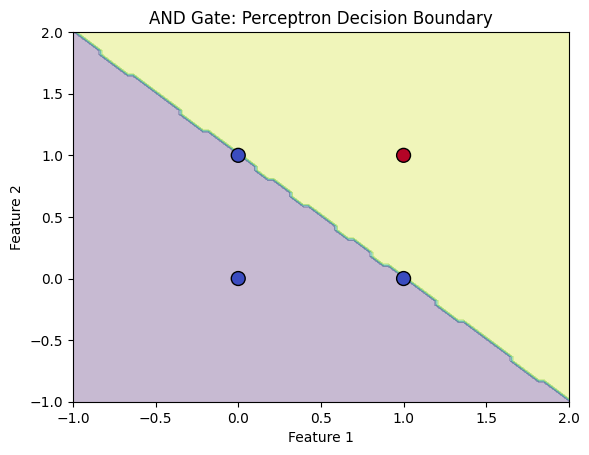

Accuracy for OR: 1.0000


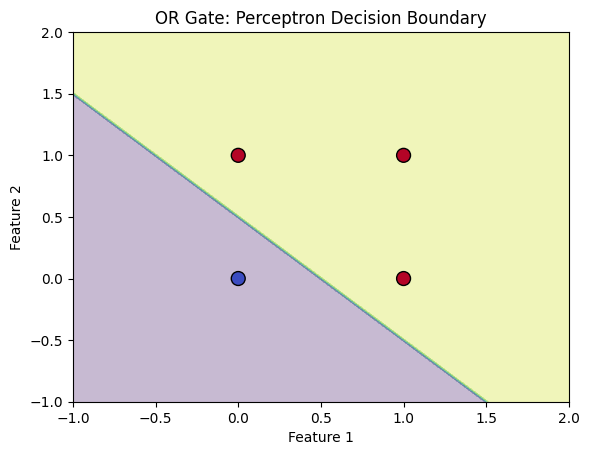

Accuracy for XOR: 0.5000


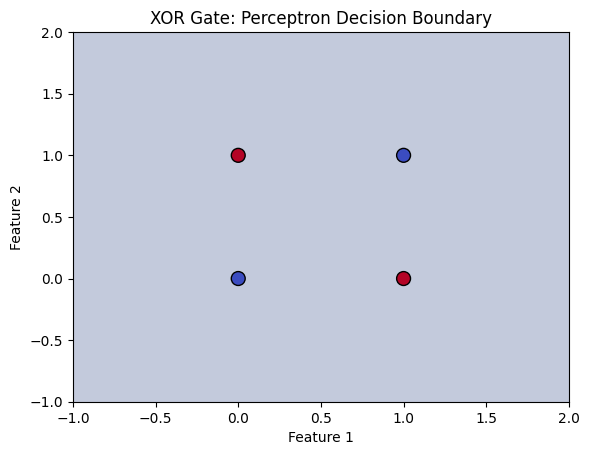

In [2]:
# Import necessary libraries for data manipulation and machine learning
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron  # Import the Perceptron from sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml  # To load MNIST dataset

# Define AND, OR, and XOR datasets
# AND Gate: 1 only when both inputs are 1
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # Output for AND gate

# OR Gate: 1 when at least one input is 1
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])  # Output for OR gate

# XOR Gate: 1 when inputs are different
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # Output for XOR gate

# Function to train and evaluate perceptron
def train_and_evaluate(X, y, gate_name):
    # Create the Perceptron model
    perceptron = Perceptron(max_iter=1000, tol=1e-3)
    perceptron.fit(X, y)  # Train the perceptron on the dataset

    # Make predictions on the same training data
    y_pred = perceptron.predict(X)

    # Evaluate accuracy
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy for {gate_name}: {accuracy:.4f}")

    # Visualize the decision boundary
    plot_decision_boundary(X, y, perceptron, gate_name)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, gate_name):
    # Create a grid of points (for plotting decision boundary)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict the labels for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{gate_name} Gate: Perceptron Decision Boundary')
    plt.show()

# Train and evaluate the perceptron on AND, OR, XOR gates
train_and_evaluate(X_and, y_and, 'AND')
train_and_evaluate(X_or, y_or, 'OR')
train_and_evaluate(X_xor, y_xor, 'XOR')

Test Accuracy on MNIST (0 vs 1): 0.9983


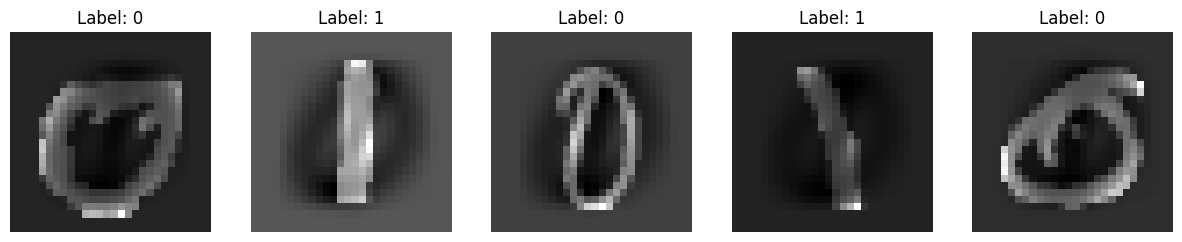

In [4]:
### Classify the MNIST Dataset

# Load the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)

# Select only digits '0' and '1' for binary classification
mnist_data = mnist.data[(mnist.target == '0') | (mnist.target == '1')]
mnist_labels = mnist.target[(mnist.target == '0') | (mnist.target == '1')]

# Convert labels to integers
mnist_labels = mnist_labels.astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_labels, test_size=0.2, random_state=42)

# Standardize the data (important for perceptrons)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Perceptron on the MNIST dataset
perceptron_mnist = Perceptron(max_iter=1000, tol=1e-3)
perceptron_mnist.fit(X_train, y_train)

# Evaluate the perceptron on the test set
y_pred = perceptron_mnist.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy on MNIST (0 vs 1): {accuracy:.4f}")

# Visualize some random MNIST test images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    # Use y_test.iloc[i] to access by position
    ax.set_title(f"Label: {y_test.iloc[i]}")
    ax.axis('off')
plt.show()


Summary:

1.AND and OR gates: Linearly separable, so the perceptron works well (100% accuracy).

2.XOR gate: Not linearly separable, and the perceptron fails to classify it correctly due to the inability to separate the classes with a single line. This shows the limitation of a single-unit perceptron in solving non-linear problems.

3.MNIST Dataset (0 vs 1):
The perceptron struggles with high-dimensional and multi-class data. It can perform binary classification, but the accuracy will be low due to the complexity of image data and the limitations of a single-layer perceptron.

For better performance on MNIST, we would need to use multi-layer perceptrons (MLP) or CNNs.